In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from ocrdgen.font.font import FontManager
from ocrdgen.image.background import BgManager
from pathlib import Path
import numpy as np
from PIL import ImageDraw, Image
from ocrdgen.ops import boxes_ops
import cv2 as cv
# from collections import OrderedDict

In [3]:
from ocrdgen.drawer.base import BaseDrawer
from ocrdgen.drawer.word import WordDrawer
from ocrdgen.drawer.text import TextDrawer

In [77]:
fm = FontManager(font_dir=Path('data/font/font_files'), font_list_file=Path('data/font/font_list.txt'), font_size=20)
bgm = BgManager(bg_dir=Path('data/bg/'))

In [78]:
img = bgm.get_bg()
np_img = np.array(img)
font, _, _ = fm.get_font()
draw = ImageDraw.Draw(img)
text = "Kota Mataram Jaya"
text_multi = "Kota Mataram Jaya\nIndonesia Jaya\nYang Baru"
label = "Field"
xy = (10,10)

In [6]:
import textwrap
"\n".join(textwrap.wrap(text, width=15))

'Kota Mataram\nJaya'

In [7]:
placeholder="..."

In [8]:
# draw.textbbox(xy, text, font, align="left")

In [9]:
# draw.multiline_textbbox(xy, text_multi, font, align="center")

In [54]:
td = TextDrawer(img, font, text_multi, label, (150,100), align="center", anchor="la")

In [55]:
td._multiline_coord()

{'xy': [(150, 100), (198, 150), (250, 200)],
 'width': [433, 336, 232],
 'max_width': 433,
 'line_spacing': 50}

In [56]:
data, image = td.draw(draw_bbox=False, draw_wordbbox=False, draw_charbbox=True)

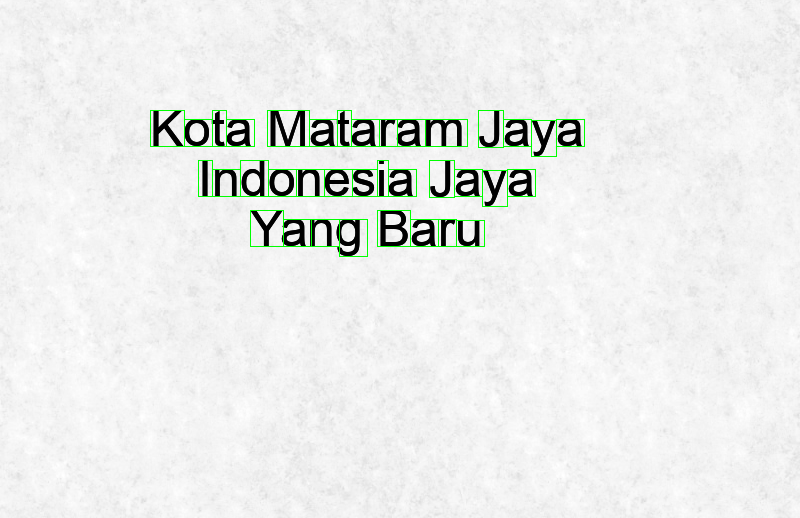

In [58]:
image

In [59]:
data

TextBox(text='Kota Mataram Jaya\nIndonesia Jaya\nYang Baru', bbox=[150, 110, 434, 146], words=[WordBox(seq_id=0, text='Kota', bbox=[150, 110, 253, 146], chars=[CharBox(seq_id=0, char='K', bbox=[150, 110, 34, 36]), CharBox(seq_id=1, char='o', bbox=[184, 119, 28, 27]), CharBox(seq_id=2, char='t', bbox=[212, 110, 14, 36]), CharBox(seq_id=3, char='a', bbox=[226, 119, 28, 27])], label=None, line=0), WordBox(seq_id=1, text='Mataram', bbox=[267, 110, 464, 146], chars=[CharBox(seq_id=0, char='M', bbox=[267, 110, 42, 36]), CharBox(seq_id=1, char='a', bbox=[309, 119, 28, 27]), CharBox(seq_id=2, char='t', bbox=[337, 110, 14, 36]), CharBox(seq_id=3, char='a', bbox=[351, 119, 28, 27]), CharBox(seq_id=4, char='r', bbox=[379, 119, 18, 27]), CharBox(seq_id=5, char='a', bbox=[397, 119, 28, 27]), CharBox(seq_id=6, char='m', bbox=[425, 119, 42, 27])], label=None, line=0), WordBox(seq_id=2, text='Jaya', bbox=[478, 110, 584, 156], chars=[CharBox(seq_id=0, char='J', bbox=[478, 110, 25, 37]), CharBox(seq_id=

In [181]:
import textwrap
from textwrap import wrap

max_width = 300
max_height = 400

w,h = image.size

xy = (100,150)

spacing = 4
stroke_width = 0

In [182]:
#calculate with max width how much character you can get


In [183]:
text = "Computer Vision is such a fast-paced field that everyday loads of new techniques and algorithms are presented in different conferences and journals. When it comes to object detection, theoretically you learn about multitudes of algorithms like Faster-rcnn, Mask-rcnn, Yolo, SSD, Retinenet, Cascaded-rcnn, Peleenet, EfficientDet, CornerNet…. This list is never-ending!"

draw = ImageDraw.Draw(img)
draw.textlength(text, font=font)

char_size = draw.textsize("A", font=font, stroke_width=stroke_width)
space_size = draw.textsize(" ", font=font, stroke_width=stroke_width)

In [207]:
wrap(text, 100)

['Computer Vision is such a fast-paced field that everyday loads of new techniques and algorithms are',
 'presented in different conferences and journals. When it comes to object detection, theoretically',
 'you learn about multitudes of algorithms like Faster-rcnn, Mask-rcnn, Yolo, SSD, Retinenet,',
 'Cascaded-rcnn, Peleenet, EfficientDet, CornerNet…. This list is never-ending!']

In [206]:
lines = []
clen = 0
temp_text = ""
words = []
for idx, txt in enumerate(text.split(" ")):
    txt_len = draw.textlength(txt, font=font) + draw.textlength(" ", font=font)
    if clen<max_width:
        words.append(txt)
        clen+=txt_len
    else:
        line = " ".join(words).strip()
        line_length = draw.textlength(line, font=font)
        # print(line_length)
        if line_length<max_width:
            lines.append(line)
            # line = ""
        else:
            line_length = draw.textlength(line, font=font)
            words = line.split(" ")
            poped = []
            while line_length>max_width:
                poped.append(words.pop())
                line = " ".join(words).strip()
                line_length = draw.textlength(line, font=font)
            
            poped.reverse()
            words = poped
            lines.append(line)
        
        print(line_length)
            
        clen=0
    
lines = [line+"\n" for line in lines]
print(lines)

231.984375
294.6875
271.28125
226.515625
294.625
250.1875
224.53125
['Computer Vision is such a\n', 'fast-paced that everyday loads of\n', 'new techniques algorithms are\n', 'presented in different and\n', 'journals. When it comes to object\n', 'theoretically you learn about\n', 'multitudes algorithms like\n']


In [174]:
split_delimiter = " "
text = "Hai Kamu  Dimana?\nTest Baru"

In [32]:
# multiwords = [txt.strip() for txt in text.split(split_delimiter) if len(txt.strip())> 0]

In [33]:
# multiwords

In [53]:
td._multiline_split(text)

['Hai Kamu  Dimana?', 'Test Baru']

In [62]:
string = "\n"

In [64]:
bytes(string, "utf-8")

b'\n'